In [1]:
from pipetorch.train import *
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score
import torchvision.transforms as transforms
import torchvision.utils as vutils

In [2]:
image_size = 64
batch_size = 64

In [3]:
transform=transforms.Compose([

  transforms.Resize((image_size, image_size)),  

  transforms.ToTensor(),

  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

In [4]:
# 设置训练数据集路径
train_ds_path = r'C:\Users\yil\Desktop\ipy project\bot-project\Car-deployment_3\train_ds'

# 加载训练数据集
train_ds = torchvision.datasets.ImageFolder(
    train_ds_path,  # 训练集的路径
    transform=transform
)

# 设置验证数据集路径
valid_ds_path = r'C:\Users\yil\Desktop\ipy project\bot-project\Car-deployment_3\valid_ds'

# 加载验证数据集
valid_ds = torchvision.datasets.ImageFolder(
    valid_ds_path,  # 验证集的路径
    transform=transform
)

In [5]:
train_dl = DataLoader(train_ds, batch_size=batch_size,shuffle=True, num_workers=2)
valid_dl = DataLoader(valid_ds, batch_size=batch_size,shuffle=True, num_workers=2)

In [6]:
def demo_batch():
    real_batch = next(iter(train_dl))
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Training Images")
    showx(vutils.make_grid(real_batch[0][:64], padding=2, normalize=True))

In [7]:
ds = train_dl.dataset

In [8]:
X, y = next(iter(train_dl))
X.shape

torch.Size([64, 3, 64, 64])

In [9]:
def showx(x):
    plt.imshow(np.transpose(x,(1,2,0)))

In [10]:
y.shape

torch.Size([64])

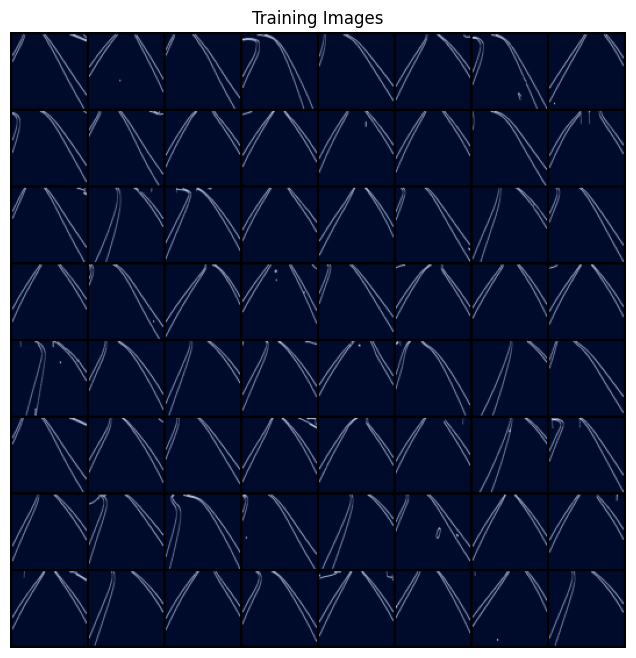

In [11]:
demo_batch()

In [35]:
def convnet3(image_size=64):
    return nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),  # 卷积层
        nn.ReLU(),  # 激活函数
        nn.MaxPool2d(kernel_size=2, stride=2),  # 最大池化层
        nn.Flatten(start_dim=1, end_dim=-1),  # 展平特征图
        nn.Linear(16 * (image_size // 2) * (image_size // 2), 128),  # 修正后的全连接层输入
        nn.ReLU(),  # 激活函数
        nn.Dropout(p=0.3),  # Dropout，防止过拟合
        nn.Linear(128, 3)  # 输出层，3 个类别
    )

In [37]:
model = convnet3()

In [39]:
# 定义损失函数，适合二分类任务的交叉熵损失
loss_fn = nn.CrossEntropyLoss()

# 假设 train_dl 和 valid_dl 是已经创建好的数据加载器
# 创建 Trainer 对象
t = Trainer(model=model, 
            loss=loss_fn, 
            train_dl=train_dl, 
            valid_dl=valid_dl, 
            metrics=accuracy_score,  # 评价标准为准确率
            halt_notebook=False)  # 是否在 notebook 中停止训练

In [41]:
t.train(100, (1e-3, 1e-2), cycle=1)

Total:   0%|          | 0/19200 [00:00<?, ?it/s]

  1 6.82s trainloss=23.47126 validloss=30.44407 accuracy_score=0.23333 
  2 7.17s trainloss=22.64777 validloss=19.15335 accuracy_score=0.28333 
  3 7.19s trainloss=16.92841 validloss=13.17666 accuracy_score=0.30000 
  4 9.79s trainloss=13.00802 validloss=10.15235 accuracy_score=0.33333 
  5 10.97s trainloss=10.62251 validloss=8.33841 accuracy_score=0.35333 
  6 10.28s trainloss=9.03361 validloss=7.12934 accuracy_score=0.36667 
  7 10.46s trainloss=7.89844 validloss=6.26525 accuracy_score=0.37619 
  8 10.51s trainloss=7.04685 validloss=5.61640 accuracy_score=0.38333 
  9 10.17s trainloss=6.38443 validloss=5.11137 accuracy_score=0.38889 
 10 10.72s trainloss=5.85354 validloss=4.70740 accuracy_score=0.39333 
 11 11.28s trainloss=5.41961 validloss=4.37657 accuracy_score=0.39697 
 12 10.37s trainloss=5.05709 validloss=4.10065 accuracy_score=0.40000 
 13 10.35s trainloss=4.74943 validloss=3.86697 accuracy_score=0.40256 
 14 10.70s trainloss=4.48561 validloss=3.66641 accuracy_score=0.40476 
 

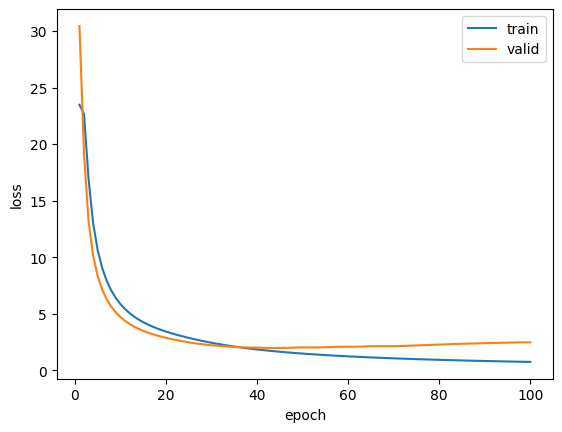

In [43]:
t.learning_curve()

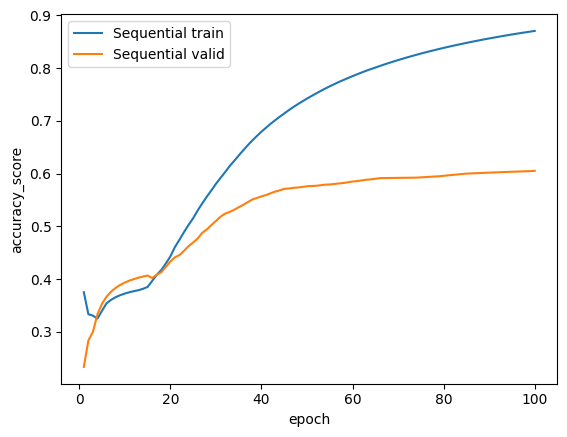

In [45]:
t.validation_curve()

In [35]:
model = model.to('cpu')  # 如果模型在 GPU 上，转移到 CPU

In [37]:
model_weights = model.state_dict()

# 保存权重到文件
torch.save(model_weights, 'model_weights_3.pth')

In [45]:
print("Class to Index mapping:", train_ds.class_to_idx)


Class to Index mapping: {'left': 0, 'right': 1, 'straight': 2}
